In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import random

import os

In [2]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/")
os.getcwd()

'/home/csarmiento/Documentos/PostDoc_docs/Lago_Work'

In [4]:
alfa_1=-2.37
A_1=7.5
Er_1=0.47

alfa_2=-2.7
A_2=5.5
Er_2=0.48

alfa_3=-3.37
A_3=2.75
Er_3=0.48

alfa_4=-5.43
A_4=0.409
Er_4=0.475

In [5]:
A=1E-5*A_1/(Er_2**alfa_2)
print(A)

1.0337430537091583e-05


In [6]:
E2=1**(alfa_2+1)
print(E2)

1.0


In [7]:
E1=0.2**(alfa_2+1)
print(E1)

15.425846568000244


In [8]:
A*(E2-E1)/(alfa_2+1)

8.77212863737903e-05

In [9]:
F1=A_1*1E-5*(10**(alfa_1+1)-0.2**(alfa_1+1))/((alfa_1+1)*(Er_1**alfa_1))
F2=A_2*1E-5*(10**(alfa_2+1)-0.2**(alfa_2+1))/((alfa_2+1)*(Er_2**alfa_2))
F3=A_3*1E-5*(10**(alfa_3+1)-0.2**(alfa_3+1))/((alfa_3+1)*(Er_3**alfa_3))
F4=A_4*1E-5*(10**(alfa_4+1)-0.2**(alfa_4+1))/((alfa_4+1)*(Er_4**alfa_4))

In [10]:
print(r"flujo para alfa = -2.37 =", F1, "particulas/m2*s")
print(r"flujo para alfa = -2.70 =", F2, "particulas/m2*s")
print(r"flujo para alfa = -3.37 =", F3, "particulas/m2*s")
print(r"flujo para alfa = -5.43 =", F4, "particulas/m2*s")

flujo para alfa = -2.37 = 8.255702792638225e-05 particulas/m2*s
flujo para alfa = -2.70 = 6.869925269347517e-05 particulas/m2*s
flujo para alfa = -3.37 = 4.434915740109312e-05 particulas/m2*s
flujo para alfa = -5.43 = 2.023964954624724e-05 particulas/m2*s


In [11]:
#Calculo flujo en lo alto de la atmosfera
h=110000

F1t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F1
F2t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F2
F3t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F3
F4t=(np.pi*(h*np.tan(1*np.pi/180))**2)*F4

In [12]:
h*np.tan(0.1*np.pi/180)

191.98641266076805

In [13]:
print(r"flujo para alfa = -2.37 =", F1t, "particulas/s")
print(r"flujo para alfa = -2.70 =", F2t, "particulas/s")
print(r"flujo para alfa = -3.37 =", F3t, "particulas/s")
print(r"flujo para alfa = -5.43 =", F4t, "particulas/s")

flujo para alfa = -2.37 = 956.163651711296 particulas/s
flujo para alfa = -2.70 = 795.6648873528412 particulas/s
flujo para alfa = -3.37 = 513.6455775607824 particulas/s
flujo para alfa = -5.43 = 234.41271694947127 particulas/s


## GRB para $\alpha$ = -2.37

### Simulaciones

- 10.000 fotones
- Energía 0.1 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.37
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [14]:
ds1=pd.read_csv(r"salida_cha_grb_237.dst", delimiter=" ")

In [15]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  85 non-null     float64
 1   N_phot           85 non-null     float64
 2   N_e+             85 non-null     float64
 3   N_e-             85 non-null     float64
 4   N_mu+            85 non-null     float64
 5   N_mu-            85 non-null     float64
 6   N_pi0            85 non-null     float64
 7   N_pi+            85 non-null     float64
 8   N_pi-            85 non-null     float64
 9   N_n              85 non-null     float64
 10  N_p              85 non-null     float64
 11  N_pbar           85 non-null     float64
 12  N_others         85 non-null     float64
 13  Total_per_bin    85 non-null     float64
dtypes: float64(14)
memory usage: 9.4 KB


In [16]:
ds1.head()

,distance_in_bin,N_phot,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,1.000000,230402.270,21160.7970,26501.0920,0.000000,0.000000,0.0,1.229350,0.000000,1.229350,0.0,0.0,0.0,278066.620
1,1.122018,38112.100,3564.2513,4531.9699,0.000000,0.976507,0.0,0.000000,0.976507,0.000000,0.0,0.0,0.0,46210.274
2,1.258925,36061.546,3364.8445,4395.7063,0.000000,0.000000,0.0,0.775667,0.000000,0.775667,0.0,0.0,0.0,43823.648
3,1.412538,34321.766,3212.5247,4293.2244,0.616134,0.000000,0.0,0.000000,0.616134,0.000000,0.0,0.0,0.0,41828.748
4,1.584893,32865.547,3045.6168,4001.9296,0.000000,0.000000,0.0,0.489413,0.000000,0.489413,0.0,0.0,0.0,39914.073


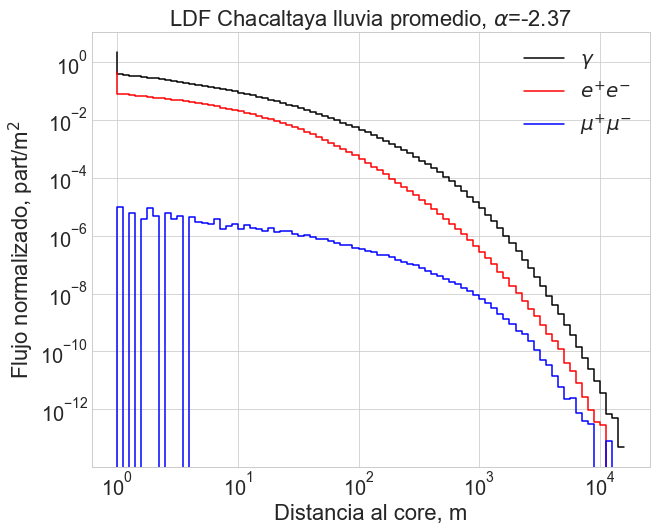

In [17]:
plt.figure(figsize=(10,8))
plt.step(ds1["distance_in_bin"], ds1["N_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(ds1["distance_in_bin"], (ds1["N_e+"]+ds1["N_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(ds1["distance_in_bin"], (ds1["N_mu+"]+ds1["N_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-2.37", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Flujo normalizado, part/m$^2$")
plt.legend(fontsize=20)

In [18]:
de1=pd.read_csv(r"salida_cha_grb_237.dse", delimiter=" ")

In [19]:
de1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  85 non-null     float64
 1   E_phot           85 non-null     float64
 2   E_e+             85 non-null     float64
 3   E_e-             85 non-null     float64
 4   E_mu+            85 non-null     float64
 5   E_mu-            85 non-null     float64
 6   E_pi0            85 non-null     float64
 7   E_pi+            85 non-null     float64
 8   E_pi-            85 non-null     float64
 9   E_n              85 non-null     float64
 10  E_p              85 non-null     float64
 11  E_pbar           85 non-null     float64
 12  E_others         85 non-null     float64
 13  Total_E_per_bin  85 non-null     float64
dtypes: float64(14)
memory usage: 9.4 KB


In [20]:
de1.head()

,distance_in_bin,E_phot,E_e+,E_e-,E_mu+,E_mu-,E_pi0,E_pi+,E_pi-,E_n,E_p,E_pbar,E_others,Total_E_per_bin
0,1.000000,120724.1200,35641.2920,36923.8070,0.0000,0.000000,0.0,9.435346,0.000000,1.256811,0.0,0.0,0.0,193299.910
1,1.122018,12412.7020,3630.1567,3835.5811,0.0000,0.230242,0.0,0.000000,2.493047,0.000000,0.0,0.0,0.0,19881.163
2,1.258925,10781.3520,3201.7839,3396.0515,0.0000,0.000000,0.0,0.301595,0.000000,0.927407,0.0,0.0,0.0,17380.416
3,1.412538,9344.2817,2773.0323,2625.5815,245.0114,0.000000,0.0,0.000000,0.677158,0.000000,0.0,0.0,0.0,14988.584
4,1.584893,8325.7843,2414.8949,2453.1665,0.0000,0.000000,0.0,129.291670,0.000000,0.487839,0.0,0.0,0.0,13323.625


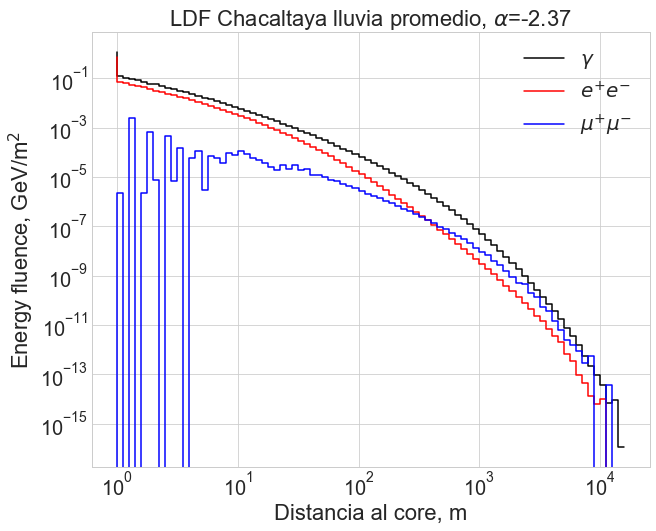

In [21]:
plt.figure(figsize=(10,8))
plt.step(de1["distance_in_bin"], de1["E_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(de1["distance_in_bin"], (de1["E_e+"]+de1["E_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(de1["distance_in_bin"], (de1["E_mu+"]+de1["E_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-2.37", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Energy fluence, GeV/m$^2$")
plt.legend(fontsize=20)

## GRB para $\alpha$ = -2.70

### Simulaciones

- 10.000 fotones
- Energía 0.1 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.37
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [22]:
ds2=pd.read_csv(r"salida_cha_grb_270.dst", delimiter=" ")

In [23]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  43 non-null     float64
 1   N_phot           43 non-null     float64
 2   N_e+             43 non-null     float64
 3   N_e-             43 non-null     float64
 4   N_mu+            43 non-null     float64
 5   N_mu-            43 non-null     float64
 6   N_pi0            43 non-null     float64
 7   N_pi+            43 non-null     float64
 8   N_pi-            43 non-null     float64
 9   N_n              43 non-null     float64
 10  N_p              43 non-null     float64
 11  N_pbar           43 non-null     float64
 12  N_others         43 non-null     float64
 13  Total_per_bin    43 non-null     float64
dtypes: float64(14)
memory usage: 4.8 KB


In [24]:
ds2.head()

,distance_in_bin,N_phot,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,1.000000,104826.890,9585.8704,12123.5630,1.088438,0.000000,0.0,0.000000,0.544219,0.000000,0.544219,0.0,0.0,126538.500
1,1.258925,30779.795,2874.0811,3720.1666,0.000000,0.686758,0.0,0.000000,0.343379,0.686758,0.000000,0.0,0.0,37375.759
2,1.584893,27764.431,2606.1721,3512.4500,0.216657,0.000000,0.0,0.000000,0.216657,0.000000,0.649972,0.0,0.0,33884.137
3,1.995262,24988.640,2333.4961,3134.4307,0.273403,0.136702,0.0,0.273403,0.273403,0.136702,0.546806,0.0,0.0,30458.207
4,2.511886,22078.665,2057.3035,2826.5928,0.258759,0.000000,0.0,0.086253,0.172506,0.000000,0.086253,0.0,0.0,26963.165


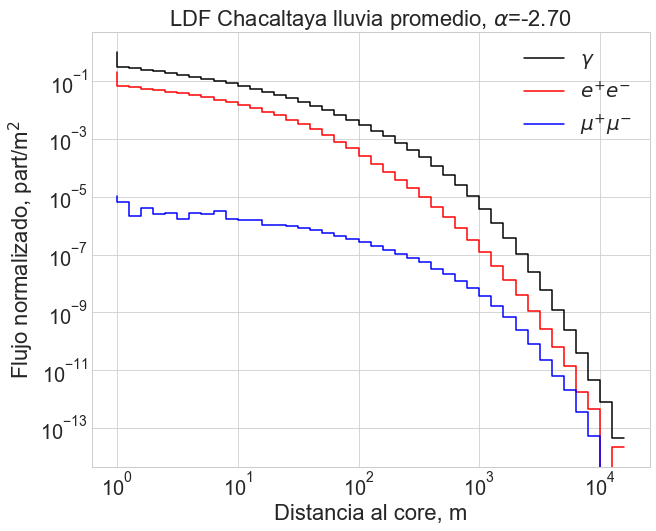

In [25]:
plt.figure(figsize=(10,8))
plt.step(ds2["distance_in_bin"], ds2["N_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(ds2["distance_in_bin"], (ds2["N_e+"]+ds2["N_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(ds2["distance_in_bin"], (ds2["N_mu+"]+ds2["N_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-2.70", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Flujo normalizado, part/m$^2$")
plt.legend(fontsize=20)

In [26]:
de2=pd.read_csv(r"salida_cha_grb_270.dse", delimiter=" ")

In [27]:
de2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  43 non-null     float64
 1   E_phot           43 non-null     float64
 2   E_e+             43 non-null     float64
 3   E_e-             43 non-null     float64
 4   E_mu+            43 non-null     float64
 5   E_mu-            43 non-null     float64
 6   E_pi0            43 non-null     float64
 7   E_pi+            43 non-null     float64
 8   E_pi-            43 non-null     float64
 9   E_n              43 non-null     float64
 10  E_p              43 non-null     float64
 11  E_pbar           43 non-null     float64
 12  E_others         43 non-null     float64
 13  Total_E_per_bin  43 non-null     float64
dtypes: float64(14)
memory usage: 4.8 KB


In [28]:
de2.head()

,distance_in_bin,E_phot,E_e+,E_e-,E_mu+,E_mu-,E_pi0,E_pi+,E_pi-,E_n,E_p,E_pbar,E_others,Total_E_per_bin
0,1.000000,48185.9590,15156.0080,14464.4690,21.250607,0.000000,0.0,0.000000,0.168066,0.000000,0.563495,0.0,0.0,77828.4170
1,1.258925,8551.1472,2479.7716,2431.3541,0.000000,0.642716,0.0,0.000000,0.096707,0.727099,0.000000,0.0,0.0,13463.7390
2,1.584893,6849.5532,1958.7900,2094.3078,0.089310,0.000000,0.0,0.000000,0.238201,0.000000,0.697980,0.0,0.0,10903.6760
3,1.995262,5282.2272,1494.5363,1549.6052,0.992662,0.076797,0.0,1.354248,0.807702,0.136135,0.559002,0.0,0.0,8330.2953
4,2.511886,3996.8739,1092.6455,1167.6865,5.251296,0.000000,0.0,0.136218,7.430996,0.000000,0.098685,0.0,0.0,6270.1231


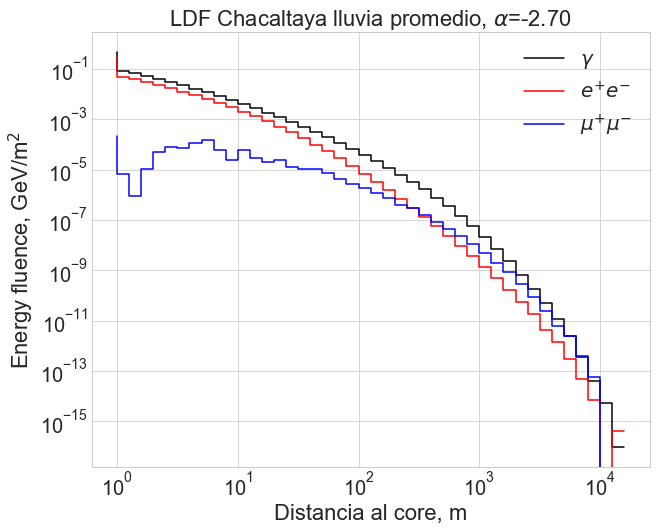

In [29]:
plt.figure(figsize=(10,8))
plt.step(de2["distance_in_bin"], de2["E_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(de2["distance_in_bin"], (de2["E_e+"]+de2["E_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(de2["distance_in_bin"], (de2["E_mu+"]+de2["E_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-2.70", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Energy fluence, GeV/m$^2$")
plt.legend(fontsize=20)

## GRB para $\alpha$ = -3.37

### Simulaciones

- 10.000 fotones
- Energía 0.1 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.37
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [30]:
ds3=pd.read_csv(r"salida_cha_grb_337.dst", delimiter=" ")

In [31]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  43 non-null     float64
 1   N_phot           43 non-null     float64
 2   N_e+             43 non-null     float64
 3   N_e-             43 non-null     float64
 4   N_mu+            43 non-null     float64
 5   N_mu-            43 non-null     float64
 6   N_pi0            43 non-null     float64
 7   N_pi+            43 non-null     float64
 8   N_pi-            43 non-null     float64
 9   N_n              43 non-null     float64
 10  N_p              43 non-null     float64
 11  N_pbar           43 non-null     float64
 12  N_others         43 non-null     float64
 13  Total_per_bin    43 non-null     float64
dtypes: float64(14)
memory usage: 4.8 KB


In [32]:
ds3.head()

,distance_in_bin,N_phot,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,1.000000,84032.285,7594.0295,9725.1904,0.544219,0.544219,0.0,1.088438,1.088438,1.088438,0.000000,0.0,0.0,101355.860
1,1.258925,24892.907,2344.5909,3003.5349,0.000000,0.000000,0.0,0.686758,0.343379,0.343379,0.000000,0.0,0.0,30242.407
2,1.584893,22510.056,2074.0615,2762.1654,0.000000,0.216657,0.0,0.000000,0.216657,0.433315,0.000000,0.0,0.0,27347.149
3,1.995262,20366.486,1884.7048,2560.2840,0.136702,0.136702,0.0,0.000000,0.136702,0.000000,0.136702,0.0,0.0,24812.022
4,2.511886,17947.842,1680.5509,2287.4261,0.000000,0.172506,0.0,0.000000,0.172506,0.000000,0.086253,0.0,0.0,21916.251


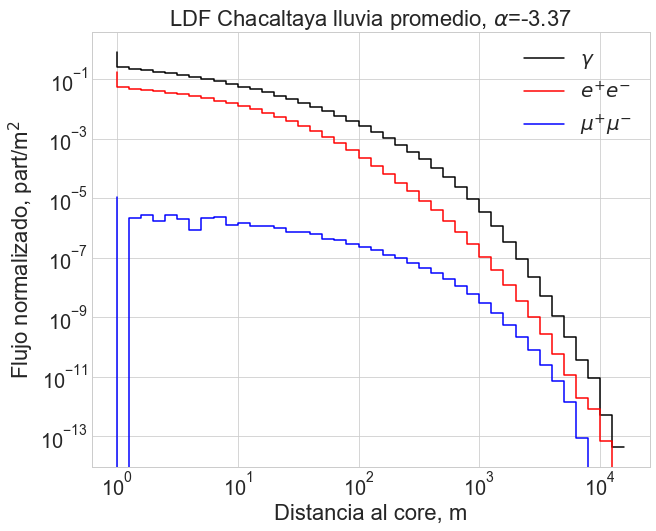

In [33]:
plt.figure(figsize=(10,8))
plt.step(ds3["distance_in_bin"], ds3["N_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(ds3["distance_in_bin"], (ds3["N_e+"]+ds3["N_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(ds3["distance_in_bin"], (ds3["N_mu+"]+ds3["N_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-3.37", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Flujo normalizado, part/m$^2$")
plt.legend(fontsize=20)

In [34]:
de3=pd.read_csv(r"salida_cha_grb_337.dse", delimiter=" ")

In [35]:
de3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  43 non-null     float64
 1   E_phot           43 non-null     float64
 2   E_e+             43 non-null     float64
 3   E_e-             43 non-null     float64
 4   E_mu+            43 non-null     float64
 5   E_mu-            43 non-null     float64
 6   E_pi0            43 non-null     float64
 7   E_pi+            43 non-null     float64
 8   E_pi-            43 non-null     float64
 9   E_n              43 non-null     float64
 10  E_p              43 non-null     float64
 11  E_pbar           43 non-null     float64
 12  E_others         43 non-null     float64
 13  Total_E_per_bin  43 non-null     float64
dtypes: float64(14)
memory usage: 4.8 KB


In [36]:
de3.head()

,distance_in_bin,E_phot,E_e+,E_e-,E_mu+,E_mu-,E_pi0,E_pi+,E_pi-,E_n,E_p,E_pbar,E_others,Total_E_per_bin
0,1.000000,38664.4300,11119.82300,11751.75300,0.357860,19.463531,0.0,3.023302,3.977846,1.094848,0.000000,0.0,0.0,61563.9230
1,1.258925,7042.9440,2073.64460,2054.05770,0.000000,0.000000,0.0,0.539940,0.106429,0.355671,0.000000,0.0,0.0,11171.6480
2,1.584893,5395.1782,1621.63350,1627.40930,0.000000,0.510512,0.0,0.000000,0.306564,0.473437,0.000000,0.0,0.0,8645.5115
3,1.995262,4153.1745,1228.49820,1247.88490,0.143807,0.039685,0.0,0.000000,0.086322,0.000000,0.165841,0.0,0.0,6629.9932
4,2.511886,3175.9926,908.12107,922.26269,0.000000,7.226209,0.0,0.000000,0.499046,0.000000,0.090272,0.0,0.0,5014.1919


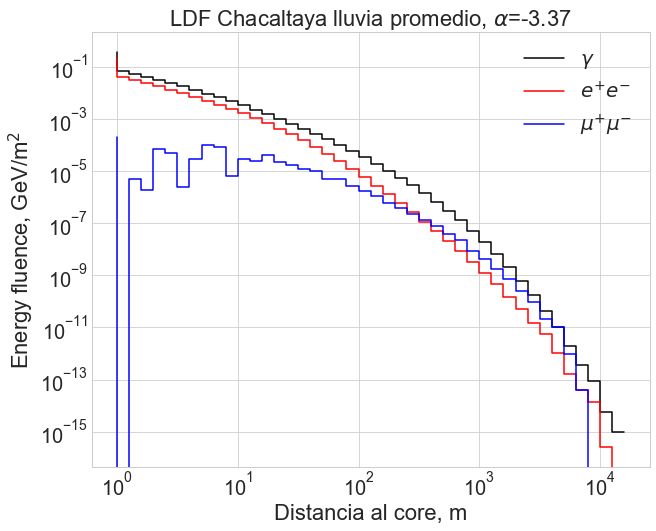

In [37]:
plt.figure(figsize=(10,8))
plt.step(de3["distance_in_bin"], de3["E_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(de3["distance_in_bin"], (de3["E_e+"]+de3["E_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(de3["distance_in_bin"], (de3["E_mu+"]+de3["E_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-3.37", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Energy fluence, GeV/m$^2$")
plt.legend(fontsize=20)

## GRB para $\alpha$ = -5.43

### Simulaciones

- 10.000 fotones
- Energía 0.1 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.37
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [38]:
ds4=pd.read_csv(r"salida_cha_grb_543.dst", delimiter=" ")

In [39]:
ds4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  44 non-null     float64
 1   N_phot           44 non-null     float64
 2   N_e+             44 non-null     float64
 3   N_e-             44 non-null     float64
 4   N_mu+            44 non-null     float64
 5   N_mu-            44 non-null     float64
 6   N_pi0            44 non-null     float64
 7   N_pi+            44 non-null     float64
 8   N_pi-            44 non-null     float64
 9   N_n              44 non-null     float64
 10  N_p              44 non-null     float64
 11  N_pbar           44 non-null     float64
 12  N_others         44 non-null     float64
 13  Total_per_bin    44 non-null     float64
dtypes: float64(14)
memory usage: 4.9 KB


In [40]:
ds4.head()

,distance_in_bin,N_phot,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,1.000000,55392.769,4985.5887,6447.9046,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.544219,0.0,0.0,66826.806
1,1.258925,16514.463,1542.8012,2005.6759,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,20062.940
2,1.584893,15017.176,1380.3244,1865.4204,0.433315,0.000000,0.0,0.216657,0.0,0.000000,0.000000,0.0,0.0,18263.570
3,1.995262,13669.339,1284.1747,1724.4905,0.136702,0.136702,0.0,0.000000,0.0,0.410105,0.273403,0.0,0.0,16678.961
4,2.511886,12281.374,1147.5945,1565.7484,0.000000,0.172506,0.0,0.000000,0.0,0.086253,0.345011,0.0,0.0,14995.320


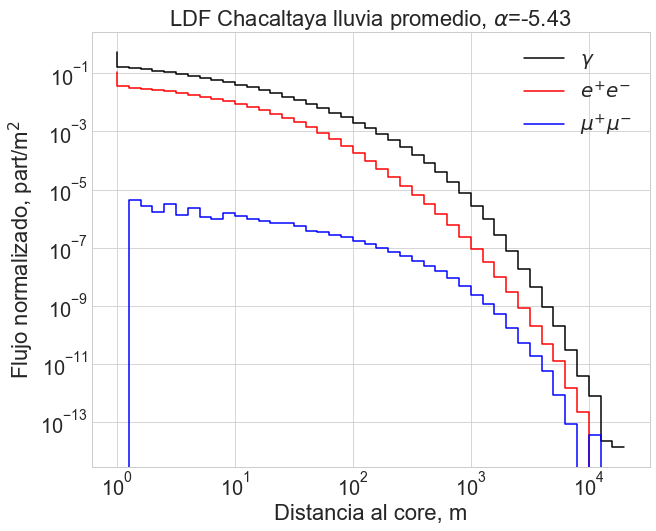

In [41]:
plt.figure(figsize=(10,8))
plt.step(ds4["distance_in_bin"], ds4["N_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(ds4["distance_in_bin"], (ds4["N_e+"]+ds4["N_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(ds4["distance_in_bin"], (ds4["N_mu+"]+ds4["N_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-5.43", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Flujo normalizado, part/m$^2$")
plt.legend(fontsize=20)

In [42]:
de4=pd.read_csv(r"salida_cha_grb_543.dse", delimiter=" ")

In [43]:
de4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  44 non-null     float64
 1   E_phot           44 non-null     float64
 2   E_e+             44 non-null     float64
 3   E_e-             44 non-null     float64
 4   E_mu+            44 non-null     float64
 5   E_mu-            44 non-null     float64
 6   E_pi0            44 non-null     float64
 7   E_pi+            44 non-null     float64
 8   E_pi-            44 non-null     float64
 9   E_n              44 non-null     float64
 10  E_p              44 non-null     float64
 11  E_pbar           44 non-null     float64
 12  E_others         44 non-null     float64
 13  Total_E_per_bin  44 non-null     float64
dtypes: float64(14)
memory usage: 4.9 KB


In [44]:
de4.head()

,distance_in_bin,E_phot,E_e+,E_e-,E_mu+,E_mu-,E_pi0,E_pi+,E_pi-,E_n,E_p,E_pbar,E_others,Total_E_per_bin
0,1.000000,22799.3250,7051.60590,6721.21030,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.597942,0.0,0.0,36572.7390
1,1.258925,4585.2245,1227.22750,1336.99350,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,7149.4455
2,1.584893,3382.6684,989.07394,1023.61180,0.076301,0.000000,0.0,0.490695,0.0,0.000000,0.000000,0.0,0.0,5395.9212
3,1.995262,2728.3371,777.81416,792.89863,0.026844,3.958559,0.0,0.000000,0.0,0.446108,0.294980,0.0,0.0,4303.7764
4,2.511886,2154.5808,614.18847,616.20272,0.000000,10.313706,0.0,0.000000,0.0,0.086170,0.364059,0.0,0.0,3395.7359


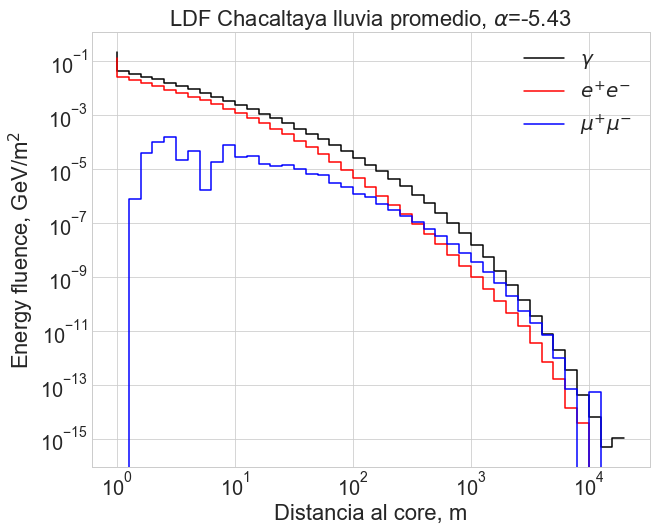

In [45]:
plt.figure(figsize=(10,8))
plt.step(de4["distance_in_bin"], de4["E_phot"]/100000, c="k", label=r"$\gamma$")
plt.step(de4["distance_in_bin"], (de4["E_e+"]+de4["E_e-"])/100000, c="r", label=r"$e^{+}e^{-}$")
plt.step(de4["distance_in_bin"], (de4["E_mu+"]+de4["E_mu-"])/100000, c="b", label=r"$\mu^{+}\mu^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF Chacaltaya lluvia promedio, $\alpha$=-5.43", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Energy fluence, GeV/m$^2$")
plt.legend(fontsize=20)